In [96]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing

In [97]:
titanic_train=pd.read_csv("DecisionTrain.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [99]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,32.699854,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.346821,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,45.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
# Clean and substitute for missing age information if any
new_age_var=np.where(titanic_train["Age"].isnull(),28,titanic_train["Age"])
titanic_train["Age"]=new_age_var  # assigning new age data to age column

In [101]:
label_encoder=preprocessing.LabelEncoder()

encoded_sex=label_encoder.fit_transform(titanic_train["Sex"])
encoded_sex

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [102]:
# Train the model
tree_model=tree.DecisionTreeClassifier()
#Used 1 IV after converting sex to a Unique value to see effect if Survived or Not
tree_model.fit(X=pd.DataFrame(encoded_sex),y=titanic_train["Survived"]) 

DecisionTreeClassifier()

In [103]:
with open("DTree1.dot",'w') as f:
    f=tree.export_graphviz(tree_model,feature_names=["Sex"],out_file=f)

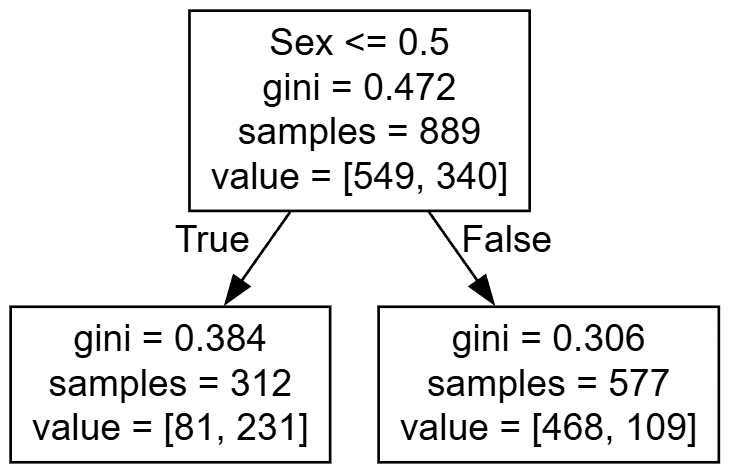

In [104]:
from IPython.display import Image
Image(filename="Dtree1.png")


In [105]:
predictors=pd.DataFrame([encoded_sex,titanic_train["Pclass"]]).T
tree_model=tree.DecisionTreeClassifier(max_depth=8)
tree_model.fit(X=predictors,y=titanic_train["Survived"])

DecisionTreeClassifier(max_depth=8)

In [106]:
with open("Dtree2.dot",'w') as f:
    f=tree.export_graphviz(tree_model,feature_names=["Sex","Pclass"],out_file=f)


In [ ]:
from IPython.display import Image
Image(filename="Dtree2.png")

In [108]:
# For 4 IVs
predictors=pd.DataFrame([encoded_sex,titanic_train["Pclass"],titanic_train["Age"],titanic_train["Fare"]]).T

tree_model=tree.DecisionTreeClassifier(max_depth=8)


In [109]:
tree_model.fit(X=predictors,y=titanic_train["Survived"])

DecisionTreeClassifier(max_depth=8)

In [110]:
with open("Dtree3.dot",'w') as f:
    f=tree.export_graphviz(tree_model,feature_names=["Sex","Pclass","Age","Fare"],out_file=f)

In [ ]:
# open webgraphviz website.
# Paste the contents of .dot file to generate the visual
# you may also save the visuals to project directory and use Image api to view it

In [111]:
tree_model.score(X=predictors,y=titanic_train["Survived"])

0.8976377952755905

In [112]:
titanic_test=pd.read_csv("test.csv")

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [113]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
new_age_var=np.where(titanic_test["Age"].isnull(),28,titanic_test["Age"])

titanic_test["Age"]=new_age_var

encoded_sex_test=label_encoder.fit_transform(titanic_test["Sex"])

test_features=pd.DataFrame([encoded_sex_test,titanic_test["Pclass"],titanic_test["Age"],titanic_test["Fare"]]).T

# Till 4 lines , similar codes as of Train Data used above

test_preds=tree_model.predict(X=test_features) # Predicting on above 4 IVs

#Creating 2 columns PassengerID(from test data) and seeing if those Passengers Survived(1) or NOT(0)

submission=pd.DataFrame({"PassengerId":titanic_test["PassengerId"],"Survived":test_preds})
print(submission)

#Storing the outcome
submission.to_csv("prediction.csv",index=False)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         0
..           ...       ...
412         1305         0
413         1306         1
414         1307         0
415         1308         0
416         1309         0

[417 rows x 2 columns]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

titanic_train.head()

In [ ]:
titanic_train["Sex"]=label_encoder.fit_transform(titanic_train["Sex"])

titanic_train["Embarked"]=label_encoder.fit_transform(titanic_train["Embarked"])


In [ ]:
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)

features=["Sex","Pclass","SibSp","Embarked","Age","Fare"]

rf_model.fit(X=titanic_train[features],y=titanic_train["Survived"])

In [ ]:
# Out of bag (OOB) score is a way of validating the Random forest model. 
print("OOB accuracy:")
print(rf_model.oob_score_)

In [ ]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)